In [1]:
import pandas as pd 
import numpy as np 
from dask import delayed 

# Lazy Evaluation

Dask achieves parallel programming using lazy evaluation: variables are not calculated till the point they are needed, instead, a task list is created and updated. When about to calculate a variable, dask splits the tasks between threads or processes.



In [2]:
def my_square_function(x): 
    return x**2 

delayed_square_function = delayed(my_square_function)

In [ ]:
delayed_square_function(4)

In [ ]:
print(delayed_square_function)

In [ ]:
delayed_result_1 = delayed(my_square_function)(4)

delayed_result_2 = (4 + delayed_result_1) * 5
print(delayed_result_2.compute())

In [6]:
x_list = [30, 23, 25 , 68]

sum_of_squares = 0

for x in x_list: 
    sum_of_squares += delayed(my_square_function)(x)



In [ ]:
type(sum_of_squares)

In [ ]:
result = sum_of_squares.compute()
print(result)

> The approach hereunder is inefficient, since the `delayed_intermediate` has to be calculated twice

In [ ]:
delayed_intermediate = delayed (my_square_function) (3)
# These two results both use delayed_intermediate
delayed_result1 = delayed_intermediate - 5
delayed_result2 = delayed_intermediate + 4
# delayed_3_squared will be computed twice
print( 'delayed_resultl:', delayed_result1.compute())
print('delayed_result2:', delayed_result2.compute())

In [ ]:
#Fixing this: 

import dask 

comp_result1, comp_result2 = dask.compute(delayed_result1, delayed_result2)

print( 'comp_result1:', comp_result1)
print('comp_result2:', comp_result2)

In [ ]:
# Import the delayed function from Dask
from dask import delayed

costs_week_1 = [1, 2, 3, 4]
costs_week_2 = [5, 1, 2, 3, 4]

# Lazily calculate the sums of costs_week_1 and costs_week_2
sum1 = delayed(np.sum)(costs_week_1)
sum2 = delayed(np.sum)(costs_week_2)

# Add the two delayed sums
total = delayed(sum1+sum2)

total.visualize()

# Compute and print the final answer
print(total.compute())

In [ ]:
from ipycytoscape import CytoscapeWidget
import ipywidgets as widgets

total.visualize()

In [ ]:
dask.visualize(sum1, sum2)

In [ ]:
dask.visualize(delayed_result1, delayed_result2)

# Dask Arrays 

Dask arrays allow to split numpy arrays into chunks.

Dask arrays are created lazily and have almost all the methods numpy arrays have (max, min, sum, mean...)

In [15]:
import numpy as np 

x= np.ones((4000, 6000))

In [ ]:
%timeit x.sum()

In [17]:
import dask.array as da 
dx = da.ones((4000, 6000), chunks=(1000, 2000))

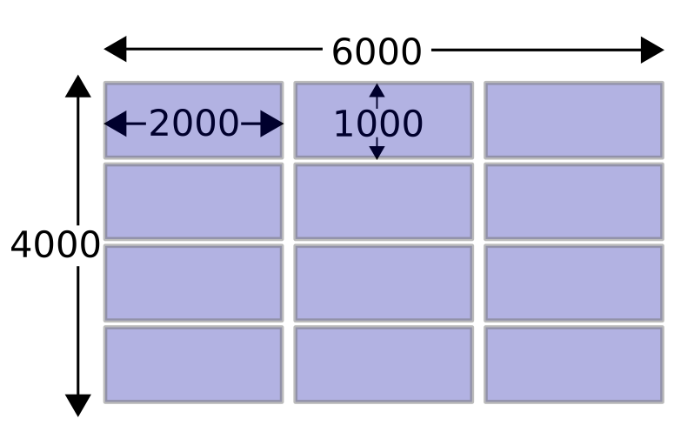

In [ ]:
%timeit dx.sum().compute()

In [ ]:
dx.sum().visualize()

## Loading data into dask arrays

In [20]:
import dask.array as da
import dask.array.image as image 

image_array = image.imread('images/*.png')


In [ ]:
print(image_array)

In [ ]:
import pandas as pd 

pandas_df = pd.read_csv(
    '../data/spotify/2005_tracks.csv'
)
pandas_df.head()


In [ ]:
import dask.dataframe as dd 

dask_df = dd.read_csv(
    "../data/spotify/*.csv"
)

print(dask_df)

In [ ]:
dask.visualize(dask_df)

In [ ]:
dask_df = dd.read_csv("../data/spotify/*.csv", blocksize="100KB")
print(dask_df)

In [33]:
col1 = dask_df['name']

In [ ]:
dask_df['popularity'].std().compute()

In [ ]:
dask_df['popularity'].min().compute()

In [ ]:
dask_df.nlargest(n=3, columns='popularity')

In [ ]:
dask_df = dd.read_csv("../data/spotify/*.csv", blocksize="10MB")
dask_df.to_csv('part-*.csv')